# Plots of the FCI concept

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyFCI import pyFCI

In [2]:
from matplotlib import font_manager
font_file = "/usr/share/fonts/avenir_ff/AvenirLTStd-Roman.ttf"
font_file_b = "/usr/share/fonts/avenir_ff/AvenirLTStd-Black.ttf"
font_file_c = "/usr/share/fonts/avenir_ff/AvenirLTStd-Book.ttf"
font_manager.fontManager.addfont(font_file)
font_manager.fontManager.addfont(font_file_b)
font_manager.fontManager.addfont(font_file_c)

In [3]:
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['image.cmap'] = 'jet'

plt.rcParams.update({
    "text.usetex": True,
    'font.family': 'Avenir LT Std',
#    "font.sans-serif": ["Computer Modern Roman"],
    "font.weight": "heavy",
    "font.size":20,
    'axes.titlesize': 30,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
    })


In [4]:
myR = "#D81B60"
myG = "#004D40"
myO = "#FE6100"

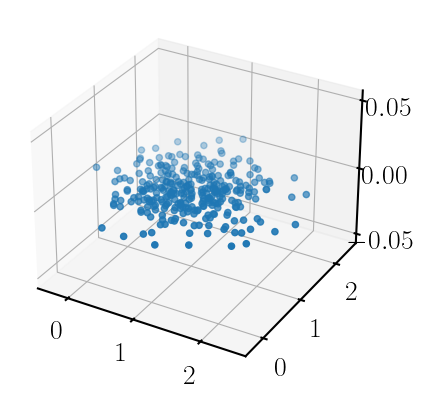

In [5]:
N = 300
d = 2 

#dataset = np.random.rand(N,d)
dataset = np.random.normal(loc=1,scale=0.5,size=(N,d))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
if d > 2:
    ax.scatter(dataset[:,0], dataset[:,1], dataset[:,2])
else:
    ax.scatter(dataset[:,0], dataset[:,1])
plt.show()

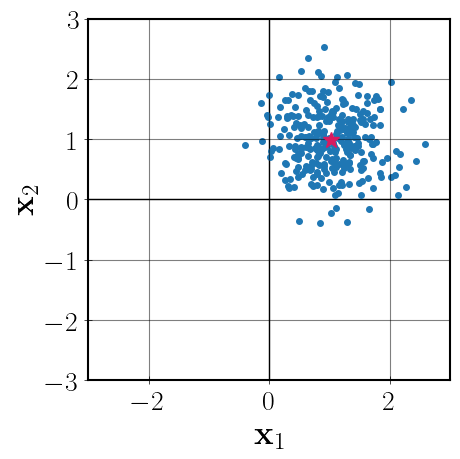

In [6]:
fig, ax = plt.subplots(tight_layout=True, figsize=(5,5))
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.scatter(dataset[:,0], dataset[:,1],marker=".")
ax.plot(dataset[:,0].mean(), dataset[:,1].mean(), '*',c=myR, ms=12)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
ax.set_aspect('equal')
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
plt.tight_layout()
#plt.savefig("FCI_dataset.pdf")
plt.show()

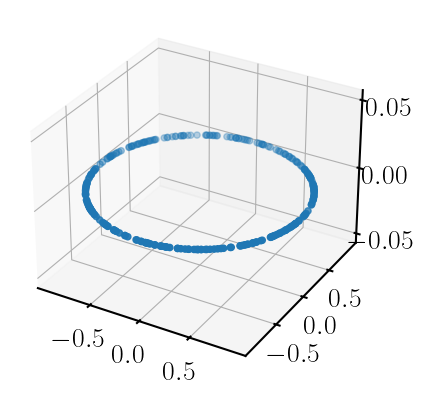

In [7]:
processed_dataset = pyFCI.center_and_normalize(dataset)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
if d > 2:
    ax.scatter(processed_dataset[:,0], processed_dataset[:,1], processed_dataset[:,2])
else:
    ax.scatter(processed_dataset[:,0], processed_dataset[:,1])

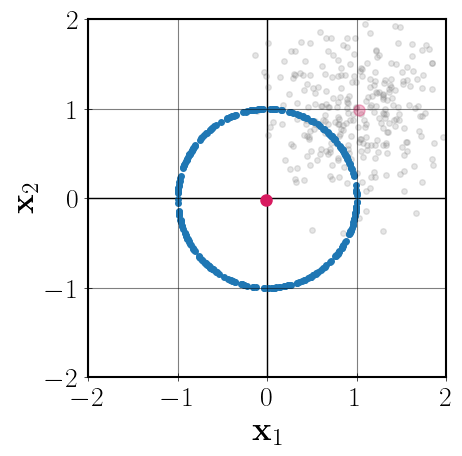

In [8]:
fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.scatter(dataset[:,0], dataset[:,1], c="gray",marker=".",alpha=0.2)
ax.plot(dataset[:,0].mean(), dataset[:,1].mean(), 'o',c=myR,alpha=0.3)
ax.scatter(processed_dataset[:,0], processed_dataset[:,1], marker=".")
ax.plot(processed_dataset[:,0].mean(), processed_dataset[:,1].mean(), 'o',c=myR)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
ax.set_aspect('equal')
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
#plt.savefig("FCI_dataset_processed.pdf")
plt.show()

In [9]:
from matplotlib.patches import Circle

In [21]:
center = np.random.choice(len(processed_dataset), size=1)
print(center)

[162]


(array([  5,  39,  57,  66,  85,  98, 116, 118, 129, 140, 142, 143, 146,
       150, 160, 162, 175, 205, 220, 234, 240, 246, 252, 268]),)


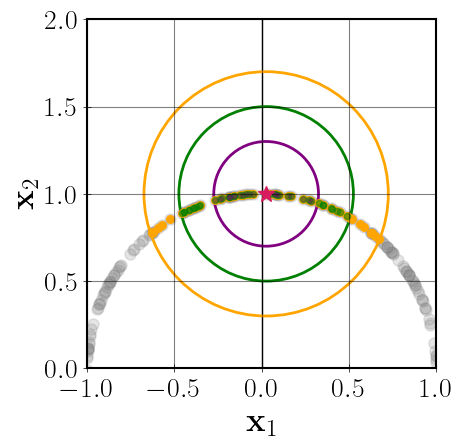

In [22]:
fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
#center = np.random.choice(len(processed_dataset), size=1)
#print(center)
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
#ax.scatter(dataset[:,0], dataset[:,1], c="gray",marker=".",alpha=0.2)
#ax.plot(dataset[:,0].mean(), dataset[:,1].mean(), 'o',c=myR,alpha=0.3)
ax.scatter(processed_dataset[:,0], processed_dataset[:,1], marker="o",c="gray",alpha=0.2)
ax.plot(processed_dataset[center,0], processed_dataset[center,1], '*',c=myR, ms=12)
circle0 = Circle((processed_dataset[center,0], processed_dataset[center,1]), 0.3, color="purple", fill=False, lw = 2)
ax.add_patch(circle0)
circle1 = Circle((processed_dataset[center,0], processed_dataset[center,1]), 0.5, color="green", fill=False, lw = 2)
ax.add_patch(circle1)
circle2 = Circle((processed_dataset[center,0], processed_dataset[center,1]), 0.7, color="orange", fill=False, lw = 2)
ax.add_patch(circle2)
incirc0 = np.where(np.sqrt((processed_dataset[:,0]-processed_dataset[center,0])**2+(processed_dataset[:,1]-processed_dataset[center,1])**2)<0.3)
incirc1 = np.where(np.sqrt((processed_dataset[:,0]-processed_dataset[center,0])**2+(processed_dataset[:,1]-processed_dataset[center,1])**2)<0.5)
incirc2 = np.where(np.sqrt((processed_dataset[:,0]-processed_dataset[center,0])**2+(processed_dataset[:,1]-processed_dataset[center,1])**2)<0.7)
print(incirc0)
ax.scatter(processed_dataset[incirc2,0], processed_dataset[incirc2,1], marker="o", s=30, c="orange" )
ax.scatter(processed_dataset[incirc1,0], processed_dataset[incirc1,1], marker="o", s=20, c="green", alpha=0.5)
ax.scatter(processed_dataset[incirc0,0], processed_dataset[incirc0,1], marker="o", s=10, c="purple", alpha=0.2)
ax.set_xlim(-1,1)
ax.set_ylim(0,2)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
ax.set_aspect('equal')
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
#plt.savefig("FCI_dataset_processed_circles.pdf")
plt.show()

In [ ]:
fci_plane = pyFCI.FCI(processed_dataset)
dim = pyFCI.fit_FCI(fci_plane)
print(dim)

[2.0005561100607476, 1.0000568507228114, 0.0018132994722467647]


In [51]:
xsp = np.linspace(0,2,100)
ysp = pyFCI.analytical_FCI(xs, dim[0]-1, dim[1])

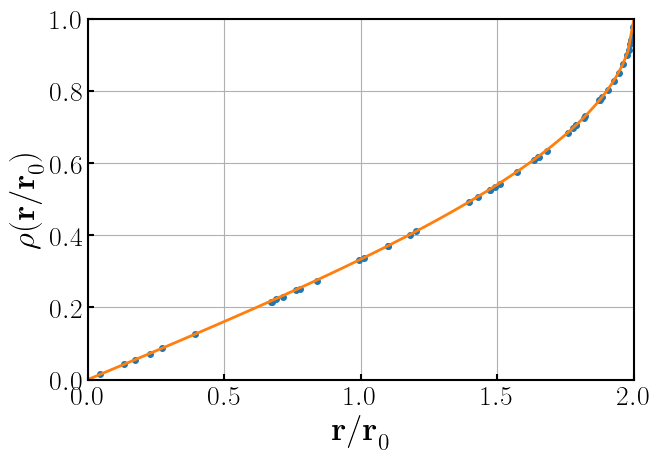

In [52]:
fig, ax = plt.subplots(tight_layout=True, figsize=(7,5))
selected_points_p = np.random.choice(len(fci_plane), size=50, replace=False)
ax.plot(fci_plane[selected_points_p,0], fci_plane[selected_points_p,1], ".",label="Empirical")
ax.plot(xsp, ysp, label="Analytical",lw=2)
ax.set_xlim([0,2])
ax.set_ylim([0,1])
ax.grid(True)

#ax.legend(loc='upper left',fontsize="x-small")
ax.set_xlabel(r"$\mathbf{r/r}_0$", fontsize="large")
ax.set_ylabel(r"$\rho(\mathbf{r/r}_0)$", fontsize="large")
#plt.savefig("FCI_example.pdf")
plt.show()

## Large dataset

In [ ]:
Nl = 100
dl = 10

ds = np.random.rand(Nl,dl)
processed_datasetl = pyFCI.center_and_normalize(ds)

In [57]:
fci = pyFCI.FCI(processed_datasetl)
fit = pyFCI.fit_FCI(fci)
xs = np.linspace(0,2,100)
ys = pyFCI.analytical_FCI(xs, fit[0]-1, fit[1])

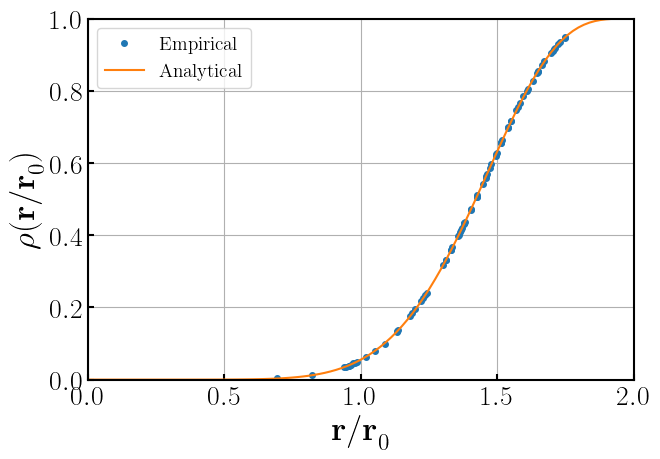

In [59]:
fig, ax = plt.subplots(tight_layout=True, figsize=(7,5))
selected_points = np.random.choice(len(fci), size=80, replace=False)
ax.plot(fci[selected_points,0], fci[selected_points,1], "." ,label="Empirical")
ax.plot(xs, ys, label="Analytical",lw=1.5)
ax.set_xlim([0,2])
ax.set_ylim([0,1])
ax.grid(True)

ax.legend(loc='upper left',fontsize="x-small")
ax.set_xlabel(r"$\mathbf{r/r}_0$", fontsize="large")
ax.set_ylabel(r"$\rho(\mathbf{r/r}_0)$", fontsize="large")
#plt.savefig("FCI_example.pdf")
plt.show()